# 支持向量机


给定一个两类分类数据集$\mathcal D = \{(\mathbf x^{(n)}, y^{(n)})\}_{n=1}^N$,其中$y_n \in \{+1, -1\} $,如果两类样本是线性可分的,即存在一个超平面

$$
\mathbf w^T+b = 0 \tag{1}
$$

将两类样本分开,那么对于每个样本都有$y^{(n)}(\mathbf w^T \mathbf x^{(n)} + b) > 0$.

数据集$\mathcal D$中每个样本$\mathbf x^{(n)}$到分割平面的距离为:

$$
\gamma^{(n)} = \frac{\Vert \mathbf w^T \mathbf x^{(n)} + b \Vert}{\Vert \mathbf w \Vert} = \frac{y^{(n)}(\mathbf w^T \mathbf x^{(n)}+b)}{\Vert \mathbf w \Vert} \tag{2}
$$

我们定义整个数据集$\mathcal D$中所有到分割超平面的最短距离为<span style="color:salmon">**间隔**</span>,用$\gamma$来表示:

$$
\gamma = \underset{n}{\min}\gamma^{(n)} \tag{3}
$$

间隔$\gamma$越大,其分割平面对数据集的划分越稳定,不容易收到噪声等因素的影响.支持向量机的目标是寻找一个超平面$\mathbf w^*, b^*)$使得$\gamma$最大,即

$$
\underset{\mathbf w, b}{\max}\ \gamma \\
s.t.\ \frac{y^{(n)}(\mathbf w^T \mathbf x^{(n)}+b)}{\Vert \mathbf w \Vert} \geq \gamma, \forall n \tag{4}
$$

令$\Vert \mathbf w \Vert \cdot \gamma = 1$,则上式等价于

$$
\underset {\mathbf w, b} {\max} \frac{1}{\Vert \mathbf w \Vert} \\
s.t.\ y^{(n)}(\mathbf w^T \mathbf x^{(n)}+b) \geq 1, \forall n \tag{5}\label{5}
$$

数据集中所有满足$y^{(n)}(\mathbf w^T\mathbf x^{(n)}+b)=1$的样本点都称为<span style="color:salmon">支持向量</span>.

**参数学习**

为了找到最大分割平面,将公式$(\ref{5})$的目标函数写完凸优化问题

$$
\underset {\mathbf w, b} {\max} \frac{1}{\Vert \mathbf w \Vert} \\
s.t.\ 1-y^{(n)}(\mathbf w^T \mathbf x^{(n)}+b) \leq 0, \forall n \tag{6}\label{6}
$$

使用拉格朗日乘数法,得到拉格朗日函数:

$$
\Lambda(\mathbf w, b, \mathbf \lambda)=\frac{1}{2}\Vert \mathbf w \Vert^2 + \sum_{n=1}^N\lambda_n\left(1-y^{(n)}(\mathbf w^T\mathbf x^{(n)}+b)\right) \tag{7}\label{7}
$$

其中$\lambda_1 \geq 0, \cdots, \lambda_N \geq 0$为拉格朗日乘数. 计算$\Lambda(\mathbf w, b, \mathbf \lambda)$关于$\mathbf w$和$b$的偏导数,并令其等于$0$得到:

$$
\mathbf w = \sum_{n=1}^N\lambda_n y^{(n)}\mathbf x^{(n)} \tag{8}\label{8} \\
$$

$$
0 = \sum_{n=1}^N\lambda_ny^{(n)} \tag{9}\label{9}
$$

将公式$(\ref{8})$代入公式$(\ref{7})$,并利用公式$\ref{9}$得到:

$$
\Gamma(\lambda)=-\frac{1}{2}\sum_{n=1}^N\sum_{m=1}^N\lambda_m\lambda_ny^{(m)}y^{(n)}(\mathbf x^{(m)})^T\mathbf x^{(n)}+\sum_{n=1}^N\lambda_n \tag{10}\label{10}
$$

<IPython.core.display.Javascript object>


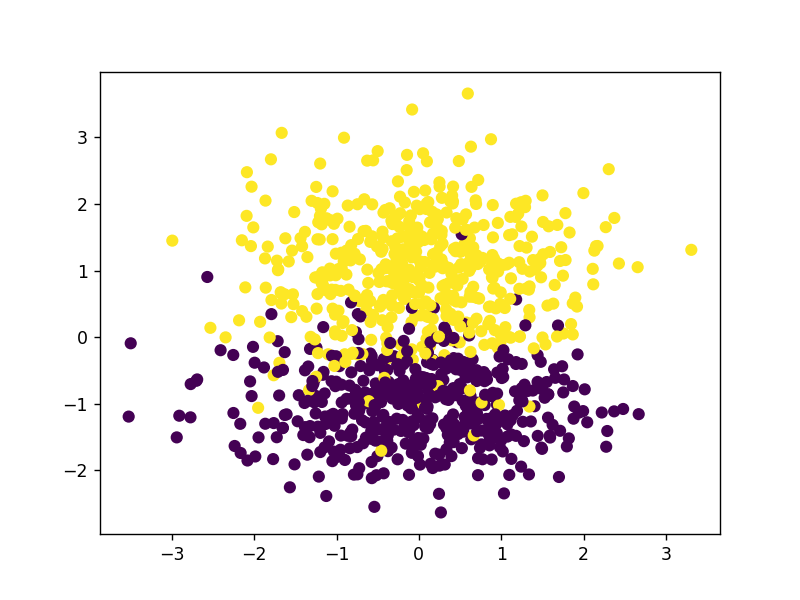

In [95]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

N = 1000
X, y = make_classification(n_samples=N, n_features=2, n_informative=1, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1)

plt.scatter(X[:, 0], X[:, 1], c=y)
X = np.c_[X, np.ones(N)]

<IPython.core.display.Javascript object>


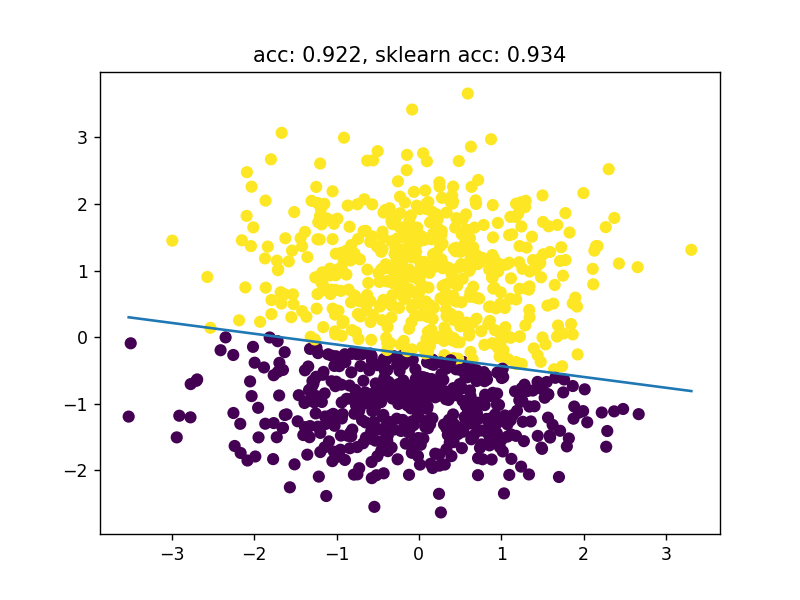

In [97]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


def svm_fit(X, y):
    y = y.reshape(-1, 1)
    enc = OneHotEncoder(categories='auto', sparse=False)
    enc.fit_transform(y)
    u = np.random.rand(1, N).reshape(1, -1)
    alpha = 0.0001
    for i in range(10000):
        du = u*y.T*(y.T.dot(X).dot(X.T))
        u = u + 0.01 * du / N

    w = (u*y.T).dot(X)
    w = w.T
    
    ypred = np.array([1 if v > 0 else 0 for v in X.dot(w).flatten()])
    acc = accuracy_score(y, ypred)
    
    return ypred, acc

plt.figure()

ypred, acc = svm_fit(X, y)
clf = SVC(gamma='auto')
clf.fit(X, y.ravel())
sk_acc = accuracy_score(clf.predict(X), y)
plt.title('acc: {}, sklearn acc: {}'.format(acc, sk_acc))

plt.scatter(X[:, 0], X[:, 1], c=ypred)


xline = np.linspace(min(X[:, 0]), max(X[:, 0]), 20)
yline = [-(w[0]*v+w[2])/w[1] for v in xline]
plt.plot(xline, yline)

<IPython.core.display.Javascript object>


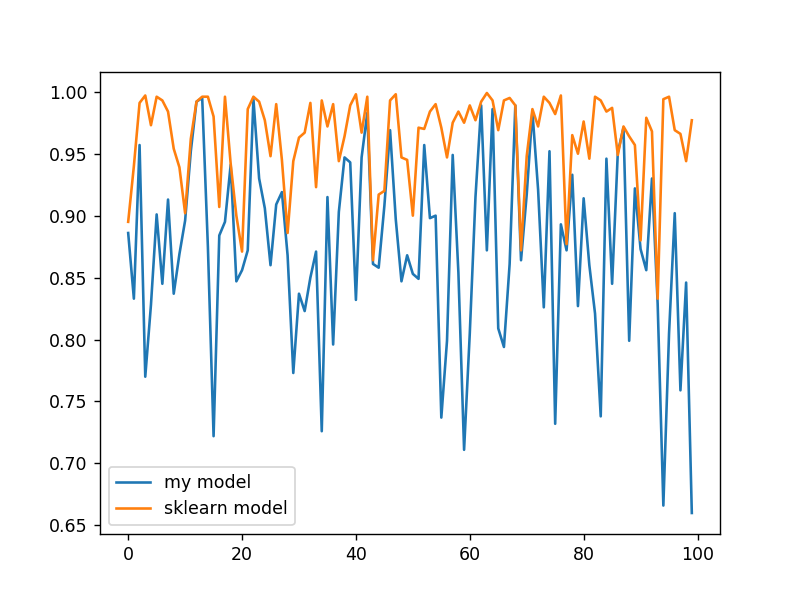

In [103]:
acc_cmp = []
for i in range(100):
    N = 1000
    X, y = make_classification(n_samples=N, n_features=2, n_informative=1, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1)
    X = np.c_[X, np.ones(N)]
    
    ypred, acc = svm_fit(X, y)
    clf = SVC(gamma='auto')
    clf.fit(X, y.ravel())
    sk_acc = accuracy_score(clf.predict(X), y)
    acc_cmp.append((acc, sk_acc))
    

plt.figure()
plt.plot([i for i in range(len(acc_cmp))], [v[0] for v in acc_cmp], label='my model')
plt.plot([i for i in range(len(acc_cmp))], [v[1] for v in acc_cmp], label='sklearn model')
plt.legend()